In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from pandas.plotting import autocorrelation_plot

In [2]:
#read the data
whofilename = 'C:/Alex Files/Private/Training/Data analysis/Projects/Life expectancy/Life-Expectancy-and-GDP-Starter/Life-Expectancy-and-GDP-Starter/all_data.csv'

df_whodata = pd.read_csv(whofilename)
df_whodata_renamed = df_whodata.copy()


In [3]:
#make column name shorter
df_whodata_renamed.rename(columns={'Life expectancy at birth (years)': 'Life_Expectancy'}, inplace=True)


In [4]:
#check if we have any missing data
df_whodata_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
#identify the range of our data
print(df_whodata_renamed[df_whodata_renamed.GDP < 4000000000])
print(df_whodata_renamed[df_whodata_renamed.GDP > 19000000000000])

Empty DataFrame
Columns: [Country, Year, Life_Expectancy, GDP]
Index: []
Empty DataFrame
Columns: [Country, Year, Life_Expectancy, GDP]
Index: []


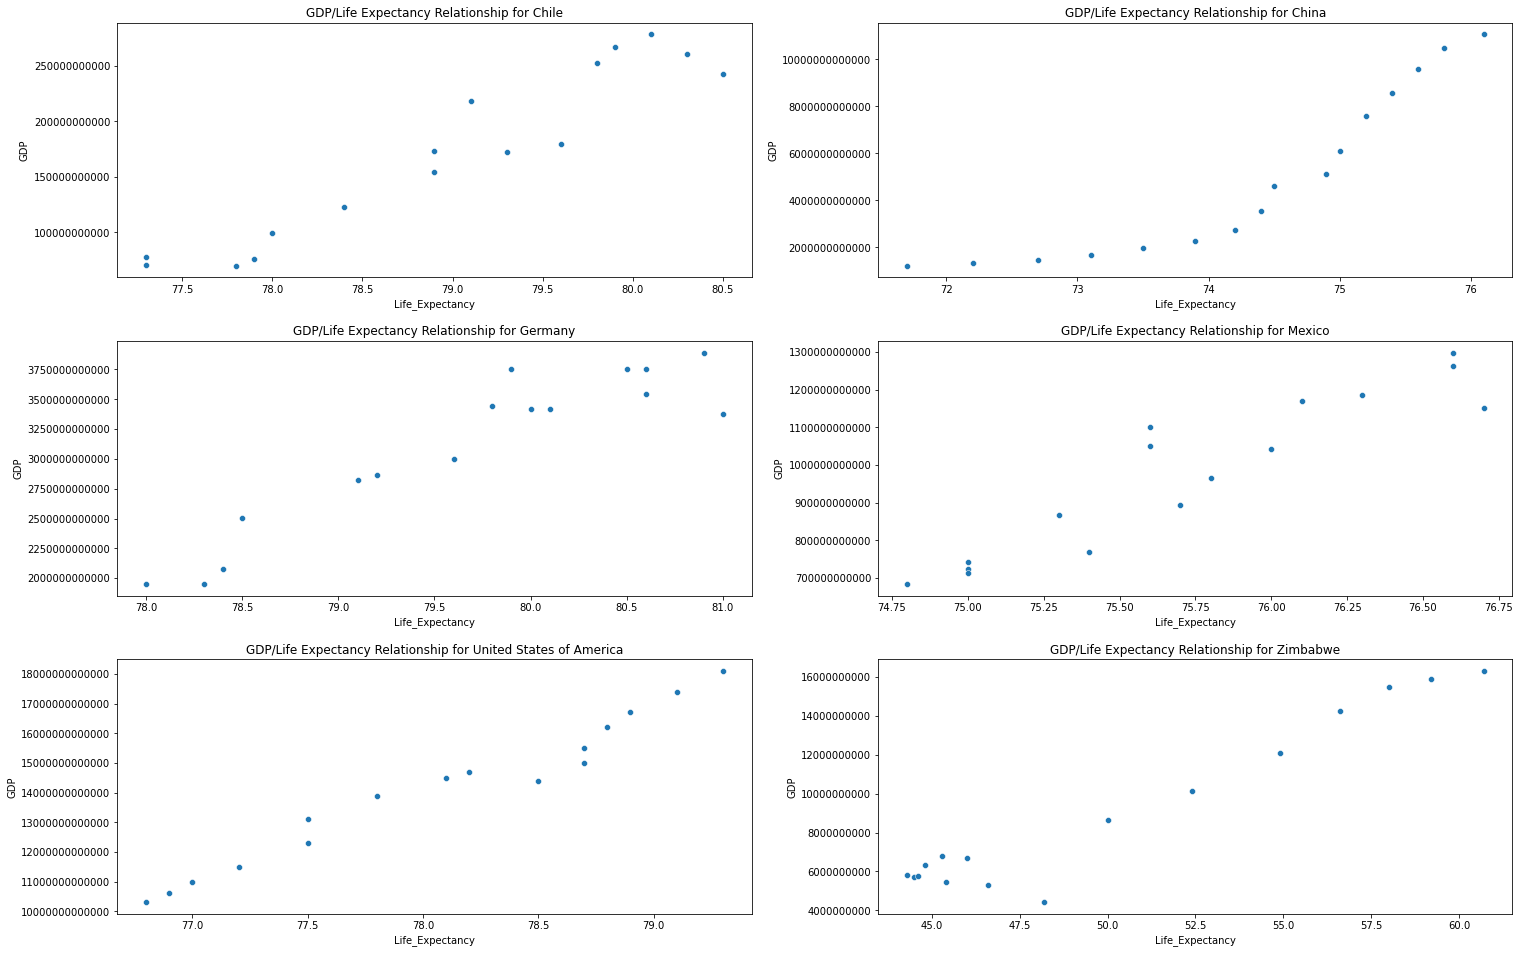

<Figure size 432x288 with 0 Axes>

In [6]:
unique_countries = df_whodata_renamed.Country.unique()
#print(len(unique_countries))

# Check the relationship between GDP and life expectancy for each of the countries in data set
dict_country = {country_name: pd.DataFrame() for country_name in unique_countries}

f = plt.figure(figsize=(25, 15))
cnt = 0
ax = plt.subplot(3,2,len(unique_countries))
for key in dict_country.keys():
    cnt += 1
    dict_country[key] = df_whodata_renamed[:][df_whodata_renamed.Country == key]
    
    axi = plt.subplot(3,2,cnt)
    sns.scatterplot(data=df_whodata_renamed[df_whodata_renamed.Country == key], x='Life_Expectancy', y='GDP')
    plt.ticklabel_format(style='plain')
    plt.title('GDP/Life Expectancy Relationship for {}'.format(key))
    
plt.subplots_adjust(top=0.95, hspace=0.25)
plt.show()
plt.clf()


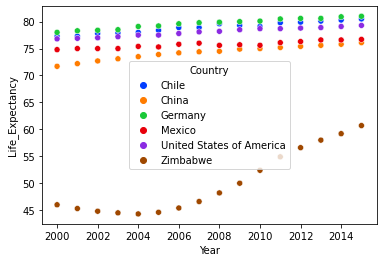

<Figure size 432x288 with 0 Axes>

In [7]:
# Check relationship between progression of years or age of nations and life expectancy 
sns.scatterplot(x='Year', y = 'Life_Expectancy', hue='Country', palette='bright', data = df_whodata_renamed)

plt.show()
plt.clf()


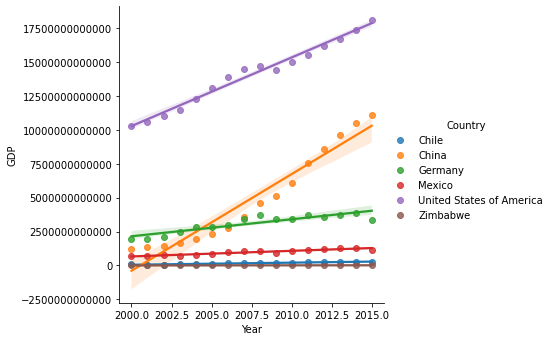

<Figure size 432x288 with 0 Axes>

In [8]:
# Check relationship between GDP and life expectancy for the different countries in a single plot
sns.lmplot(x='Year', y='GDP', hue = 'Country', data = df_whodata_renamed)
plt.ticklabel_format(style='plain')
plt.show()
plt.clf()


In [9]:
#calculate correlation of GDP and Life Expectancy
corr_le_gdp, p = pearsonr(df_whodata_renamed['GDP'], df_whodata_renamed['Life_Expectancy'])
print(corr_le_gdp, p)


0.34320674844915594 0.0006187129569469861


In [10]:
#check if removing ZImbabwe has major impact on the correlation
df_whodata_nozim = df_whodata_renamed.copy()
df_whodata_nozim = df_whodata_nozim[df_whodata_nozim.Country != 'Zimbabwe']
corr_le_gdp, p = pearsonr(df_whodata_nozim['GDP'], df_whodata_nozim['Life_Expectancy'])
print(corr_le_gdp, p)

0.12668946170227763 0.2627861579727


In [11]:
#check if Zimbabwe has major correlation
df_whodata_nozim = df_whodata_renamed.copy()
df_whodata_nozim = df_whodata_nozim[df_whodata_nozim.Country == 'Zimbabwe']
corr_le_gdp, p = pearsonr(df_whodata_nozim['GDP'], df_whodata_nozim['Life_Expectancy'])
print(corr_le_gdp, p)

0.9661998955858777 1.2358516366846197e-09
